In [184]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# All timing are in micro seconds (us)

In [268]:
gs_columns = ["Grayskull | bf16 M4", "Grayskull | bf16 M2"]
v100_column = 'Nvidia v100 | fp16'
p100_column = 'Nvidia p100 | fp16'
sr_column = 'Sapphire Rapids | bf16'


In [269]:
df = pd.read_csv("./results/oob_pw.csv")
 # df = df[df['m'] != 256]
df = df[(df['conf'] == "f16_m4") | (df['conf'] == "f16_m2")]
pd.options.display.max_rows = 90
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df.reset_index(inplace=True, drop = True)
df


,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
0,f16_m4,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,0.23%,0.17%,225.613912,0.148725,0.7600,34.0,25.0,1000.0,45.87500,300
1,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1.77%,1.29%,230.815411,1.162988,0.7600,34.0,25.0,1000.0,48.37500,300
2,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,14.25%,10.36%,229.980151,9.337691,0.7600,37.0,27.0,1000.0,48.62500,300
3,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,26.52%,19.28%,988.639196,17.377289,0.7600,42.0,33.0,1000.0,50.56250,300
4,f16_m4,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,31.51%,22.91%,2808.128993,20.647933,0.7600,47.0,36.0,980.0,50.81250,300
5,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,35.39%,25.74%,6147.174835,22.358068,0.7550,59.5,45.0,971.5,54.87500,300
6,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.77%,28.19%,44894.468784,24.491027,0.7500,59.0,44.0,959.5,56.37500,300
7,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,0.12%,0.09%,213.250319,0.157348,0.7600,33.0,24.0,1000.0,42.00000,300
8,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,0.97%,0.71%,210.941633,1.272558,0.7600,33.0,24.0,1000.0,44.06250,300
9,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7.33%,5.33%,223.553975,9.606108,0.7600,36.0,26.0,1000.0,46.37500,300


In [270]:
df_sf = pd.read_csv("./results/cpu/torch_bfp16_gmtg.csv")
df_sf['tflops'] = 2 * (df_sf['m']**3) / 1e6  / df_sf['torch_bfp16_gmtg']
df_sf['run'] = df_sf['torch_bfp16_gmtg']
df_sf.drop('torch_bfp16_gmtg', axis=1, inplace=True)
df_sf

,m,tflops,run
0,256,0.356577,94.101429
1,512,2.840384,94.506741
2,1024,14.657531,146.510601
3,2048,11.643602,1475.477219
4,3072,23.639702,2452.740669
5,4096,20.595335,6673.305035
6,8192,26.143616,42056.601048


In [271]:
df_p100 = pd.read_csv("./results/gpu/p100_f16.csv")
# df_p100 = df_p100[df_p100['m'] != 256]
df_p100.reset_index(inplace=True, drop = True)
df_p100

,m,run,tflops,power
0,256,20.132860,1.669281,93.546500
1,512,57.132641,4.724800,97.227083
2,1024,419.131120,5.129846,117.647333
3,2048,2985.932032,5.753737,144.899333
4,3072,9568.478531,6.059697,142.936000
5,4096,21848.946545,6.290416,137.678583
6,8192,191736.122502,5.734710,168.684417


In [272]:
df_v100 = pd.read_csv("./results/gpu/v100_f16.csv")
# df_v100 = df_v100[df_v100['m'] != 256]
df_v100.reset_index(inplace=True, drop = True)
df_v100

,m,run,tflops,power
0,256,35.029120,0.973857,40.678250
1,512,36.763218,7.301822,46.387500
2,1024,64.622296,33.391530,89.630500
3,2048,301.021735,57.074465,121.090000
4,3072,901.697477,64.304608,85.664667
5,4096,1989.520523,69.081682,126.920000
6,8192,15132.766035,72.657770,131.808250


In [273]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [274]:
df_inf = get_column_df_info(df, 'run')
df_inf.columns = gs_columns
df_inf[p100_column] = df_p100['run'].values
df_inf[v100_column] = df_v100['run'].values
df_inf[sr_column] = df_sf['run'].values
df_inf

,Grayskull | bf16 M4,Grayskull | bf16 M2,Nvidia p100 | fp16,Nvidia v100 | fp16,Sapphire Rapids | bf16
256,225.613912,213.250319,20.132860,35.029120,94.101429
512,230.815411,210.941633,57.132641,36.763218,94.506741
1024,229.980151,223.553975,419.131120,64.622296,146.510601
2048,988.639196,909.817219,2985.932032,301.021735,1475.477219
3072,2808.128993,2245.309353,9568.478531,901.697477,2452.740669
4096,6147.174835,4611.134529,21848.946545,1989.520523,6673.305035
8192,44894.468784,32638.672988,191736.122502,15132.766035,42056.601048


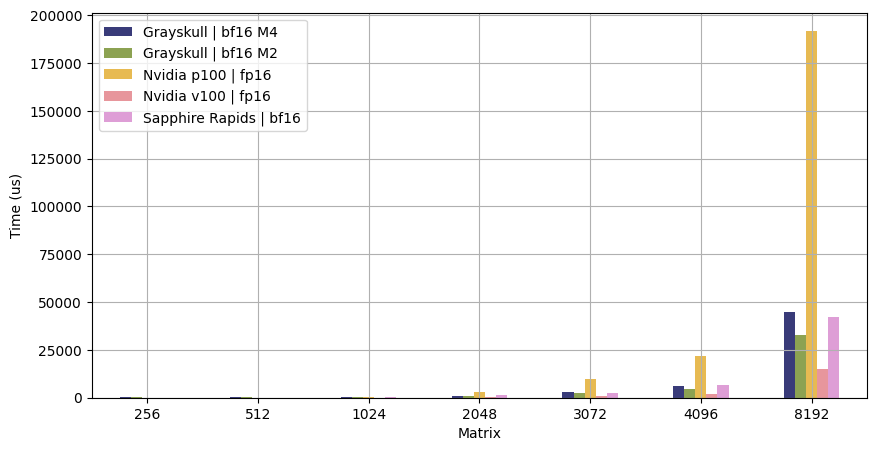

In [275]:
p = df_inf.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_ylabel('Time (us)')
p.set_xlabel('Matrix')
plt.grid(True)

plt.show()

## GFLOPS

In [294]:
df_tflops = get_column_df_info(df, 'tflops')
df_tflops.columns = gs_columns
df_tflops[p100_column] = df_p100['tflops'].values
df_tflops[v100_column] = df_v100['tflops'].values
df_tflops[sr_column] = df_sf['tflops'].values
df_tflops

,Grayskull | bf16 M4,Grayskull | bf16 M2,Nvidia p100 | fp16,Nvidia v100 | fp16,Sapphire Rapids | bf16
256,0.148725,0.157348,1.669281,0.973857,0.356577
512,1.162988,1.272558,4.724800,7.301822,2.840384
1024,9.337691,9.606108,5.129846,33.391530,14.657531
2048,17.377289,18.882770,5.753737,57.074465,11.643602
3072,20.647933,25.823639,6.059697,64.304608,23.639702
4096,22.358068,29.805887,6.290416,69.081682,20.595335
8192,24.491027,33.687388,5.734710,72.657770,26.143616


In [295]:
def calculate_matrix_size(m, element_size=2):
    # Calculate the size in bytes
    size_in_bytes = m * m * element_size
    # Convert to megabytes
    size_in_megabytes = size_in_bytes / (1024 * 1024)
    return size_in_megabytes

# Example usage
m = 3072
matrix_size_mb = calculate_matrix_size(m)
print(f"The size of a {m}x{m} matrix is {matrix_size_mb} MB")

The size of a 3072x3072 matrix is 18.0 MB


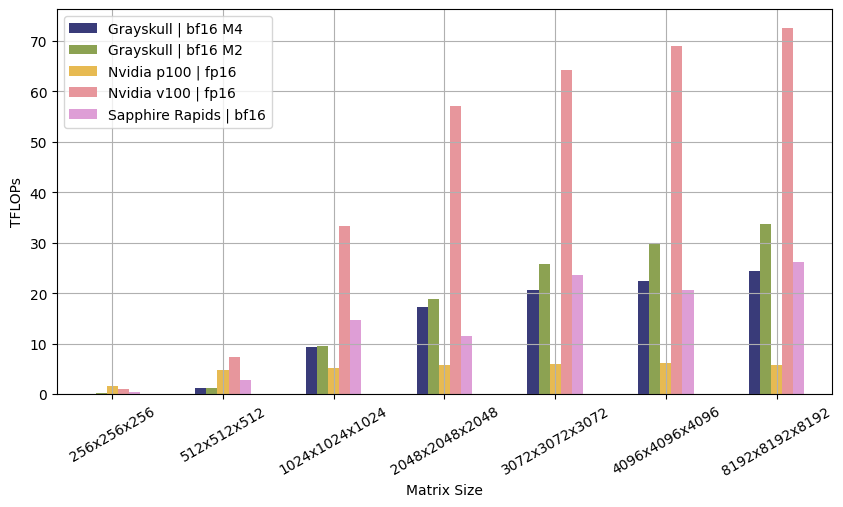

In [296]:
fig, ax = plt.subplots()

# df_tflops.drop(index=256, inplace=True)
p = df_tflops.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)

# Adjust the width of the bars and the spacing between them
# for bar in ax.patches:
#     if ax.patches.index(bar) % len(df_tflops.columns) == 0:
#         bar.set_facecolor(colors[-1])
#     elif ax.patches.index(bar) % len(df_tflops.columns) == len(df_tflops.columns) - 1:
#         bar.set_facecolor(colors[0])
#     bar.set_width(bar.get_width() * 0.8)

p.set_xticklabels([f"{m}x{m}x{m}" for m in df_tflops.index], rotation=30)
p.set_ylabel('TFLOPs')
plt.grid(True)

p.set_xlabel('Matrix Size')
plt.show()

## Power

In [289]:
df_power = get_column_df_info(df, 'power')
df_power.columns = gs_columns
df_power[p100_column] = df_p100['power'].values
df_power[v100_column] = df_v100['power'].values
# df_power[sr_column] = 0
df_power

,Grayskull | bf16 M4,Grayskull | bf16 M2,Nvidia p100 | fp16,Nvidia v100 | fp16
256,25.0,24.0,93.546500,40.678250
512,25.0,24.0,97.227083,46.387500
1024,27.0,26.0,117.647333,89.630500
2048,33.0,32.0,144.899333,121.090000
3072,36.0,33.0,142.936000,85.664667
4096,45.0,44.0,137.678583,126.920000
8192,44.0,44.0,168.684417,131.808250


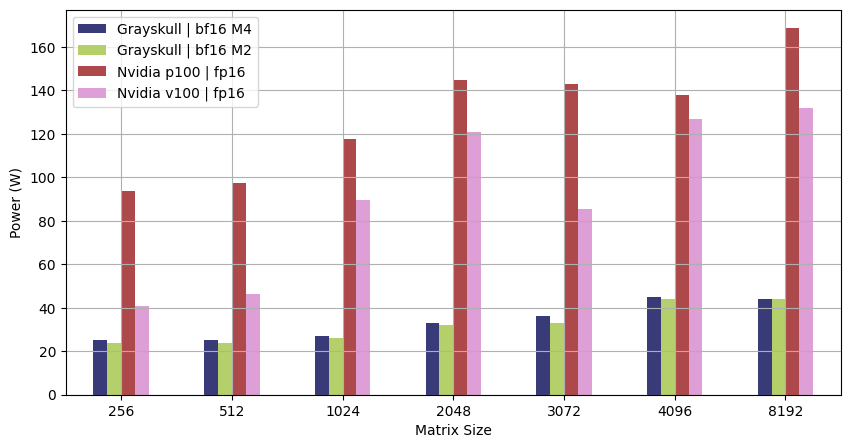

In [290]:
p = df_power.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_xlabel("Matrix Size")
p.set_ylabel("Power (W)")
plt.grid(True)

plt.show()

## GFLOPS per Watt

In [291]:
df_gflops_w = df_tflops / df_power 
df_gflops_w

,Grayskull | bf16 M4,Grayskull | bf16 M2,Nvidia p100 | fp16,Nvidia v100 | fp16
256,0.005949,0.006556,0.017844,0.023940
512,0.046520,0.053023,0.048596,0.157409
1024,0.345840,0.369466,0.043604,0.372547
2048,0.526585,0.590087,0.039709,0.471339
3072,0.573554,0.782535,0.042394,0.750655
4096,0.496846,0.677407,0.045689,0.544293
8192,0.556614,0.765622,0.033997,0.551238


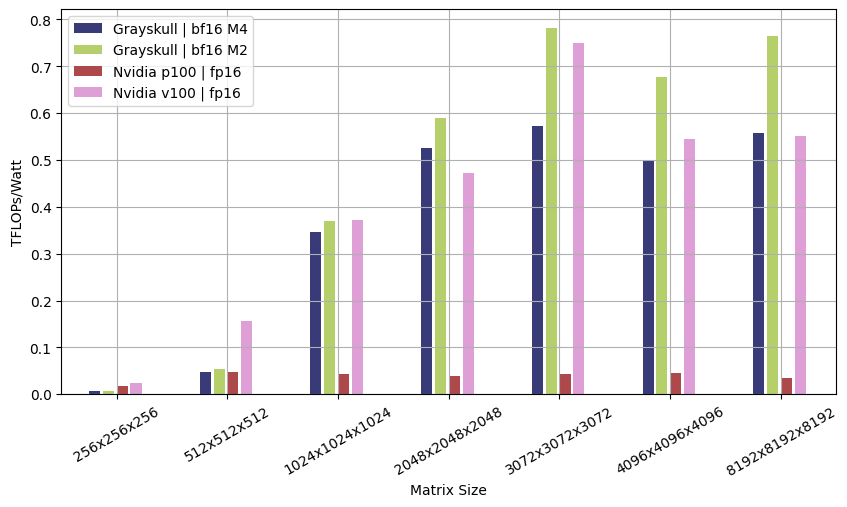

In [292]:
fig, ax = plt.subplots()
p = df_gflops_w.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)

# for container in ax.containers:
    # labels = [f'{v.get_height():.2f}' for v in container]
    # ax.bar_label(container, labels=labels, padding=5, label_type='edge', fmt='%.2f', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    # ax.bar_label(container, padding=5, label_type='edge', fmt='%.2f')

# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.legend(loc='upper left')
p.set_ylabel('TFLOPs/Watt')
p.set_xticklabels([f"{m}x{m}x{m}" for m in df_gflops_w.index], rotation=30)
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()


## TFLOPs per Dollar

In [293]:
conf = 'bfloat16_m4'
gs_cost = 599
df_gflops_d = df_tflops * 1e3 / gs_cost 
df_gflops_d

,Grayskull | bf16 M4,Grayskull | bf16 M2,Nvidia p100 | fp16,Nvidia v100 | fp16
256,0.248289,0.262684,2.786780,1.625805
512,1.941549,2.124471,7.887813,12.190020
1024,15.588800,16.036908,8.564016,55.745458
2048,29.010499,31.523823,9.605570,95.282914
3072,34.470672,43.111251,10.116356,107.353268
4096,37.325656,49.759410,10.501529,115.328351
8192,40.886522,56.239378,9.573806,121.298448
